In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
%matplotlib inline 

# Reading the Data 

In [7]:
df=pd.read_csv(r'C:\Users\joe\Downloads\FuelConsumption.csv')
df.head()

,MODEL_Year,MAKE,MODEL,VEHICLE CLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTION,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,9.8,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,300
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,244


In [8]:
df.describe()

,MODEL_Year,ENGINESIZE,CYLINDERS,FUELCONSUMPTION,CO2EMISSIONS
count,200.0,200.000000,200.000000,200.000000,200.000000
mean,2014.0,3.511500,6.340000,13.780500,269.875000
std,0.0,1.355583,2.026061,3.282337,58.378847
min,2014.0,1.400000,4.000000,7.600000,136.000000
25%,2014.0,2.300000,4.000000,11.475000,227.750000
50%,2014.0,3.000000,6.000000,13.100000,258.000000
75%,2014.0,4.400000,8.000000,15.400000,304.500000
max,2014.0,6.800000,12.000000,25.700000,437.000000


In [15]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,9.8,136
3,3.5,6,12.7,300
4,3.5,6,12.1,244


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>]], dtype=object)

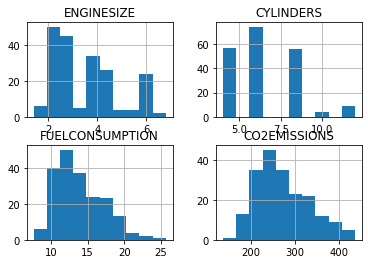

In [16]:
cdf.hist()

# Plt each of the feature with co2 emission

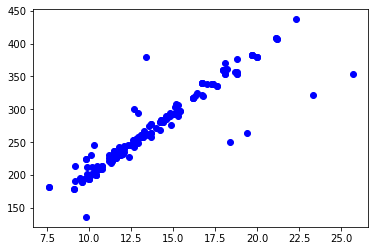

In [17]:
plt.scatter (cdf.FUELCONSUMPTION,cdf.CO2EMISSIONS,color='blue')
plt.show()

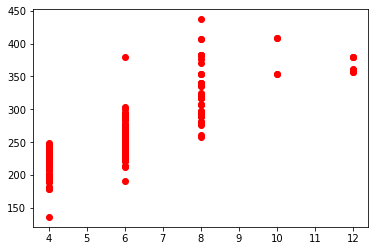

In [18]:
plt.scatter (cdf.CYLINDERS,cdf.CO2EMISSIONS,color='red')
plt.show()

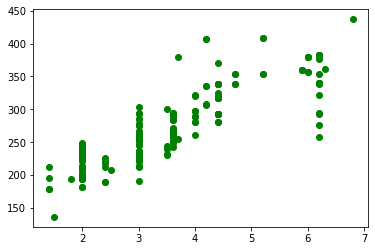

In [19]:
plt.scatter (cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='green')
plt.show()

# Dividing into train and test dataset 

In [29]:
print(len(df))
msk=np.random.rand(len(df))<0.8
print(msk)

train=cdf[msk]
print(train)
test=cdf[~msk]
print(test)
index=test.index
print(len(index))



200
[ True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True False  True  True  True  True  True False
  True  True  True  True  True  True False  True False False  True  True
 False  True  True False  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True False  True  True  True  True False False
  True  True  True  True  True  True  True  True  True False False  True
 False  True  True  True  True  True False Fals

# Modelling

In [30]:
from sklearn import linear_model
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
test_x=np.asanyarray(train[["ENGINESIZE"]])
test_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr=linear_model.LinearRegression()
regr.fit(train_x,train_y)



LinearRegression()

In [31]:
print("Coefficient",regr.coef_)
print("Intercept",regr.intercept_)

Coefficient [[36.11026172]]
Intercept [144.63669915]


Text(0, 0.5, 'Emission')

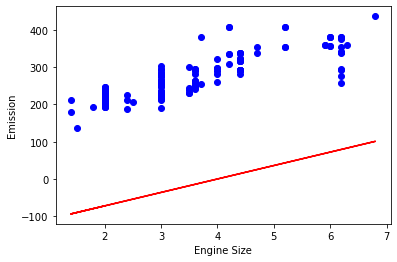

In [34]:
#y_pred=regr.predict(test_x)
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x-regr.intercept_[0],'-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")


In [35]:
y_pred=regr.predict(train_x)

In [36]:
df1=pd.DataFrame({'Actual':test_y.flatten(),'Predicted':y_pred.flatten()})
df1

,Actual,Predicted
0,196,216.857223
1,136,198.802092
2,300,271.022615
3,244,271.022615
4,230,271.022615
...,...,...
150,292,368.520322
151,340,368.520322
152,276,368.520322
153,258,368.520322


<function matplotlib.pyplot.show(close=None, block=None)>

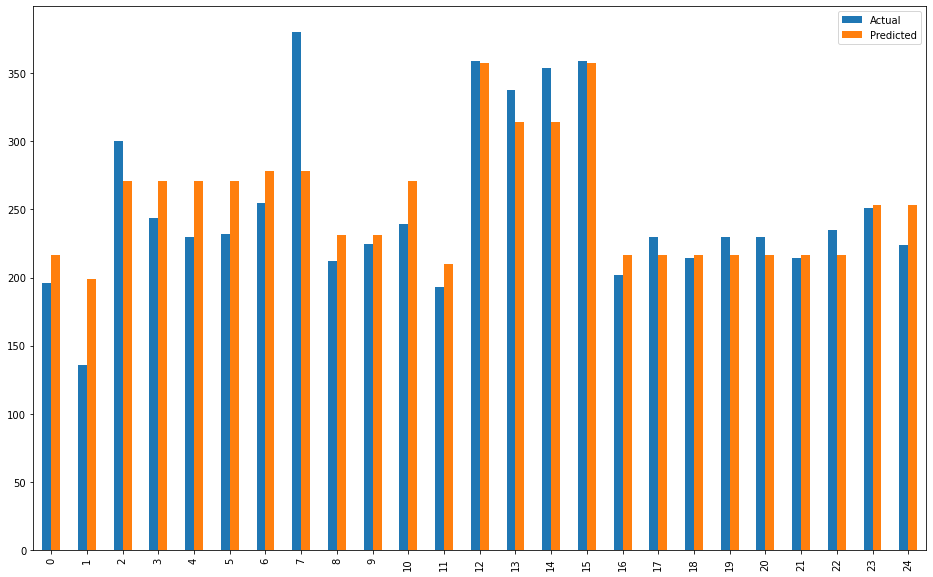

In [38]:
df2=df1.head(25)
df2.plot(kind="bar",figsize=(16,10))
plt.show

In [40]:
print('Mean Absolute Error: %2f'%np.mean(np.absolute(y_pred-test_y)))

Mean Absolute Error: 23.324604
